In [221]:
import pandas as pd

df = pd.read_csv("data/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [222]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [223]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

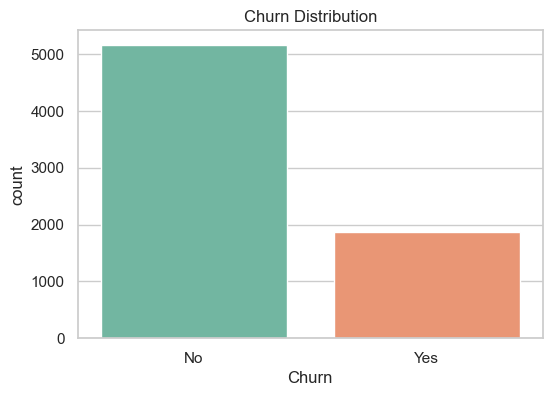

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Churn Distribution')
plt.show()

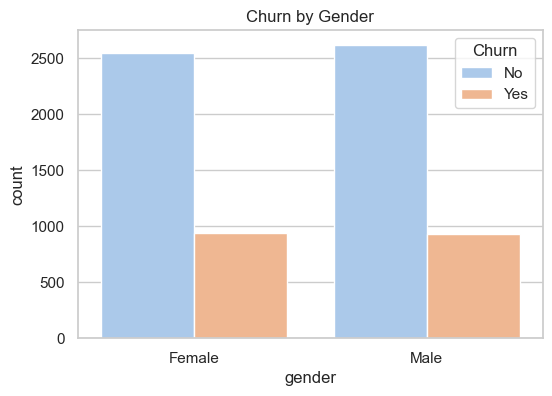

In [225]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn', palette='pastel')
plt.title('Churn by Gender')
plt.show()

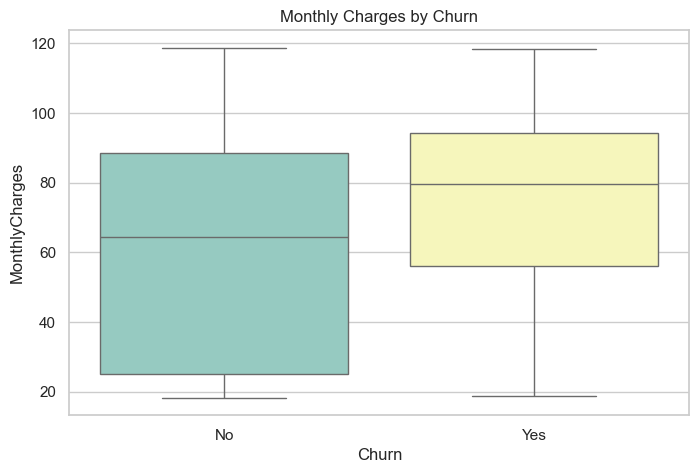

In [226]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set3', dodge=False)
plt.title('Monthly Charges by Churn')
plt.show()

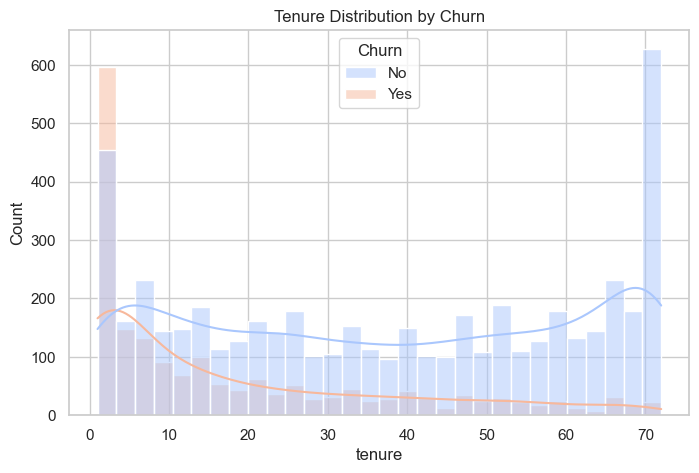

In [227]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30, palette='coolwarm')
plt.title('Tenure Distribution by Churn')
plt.show()

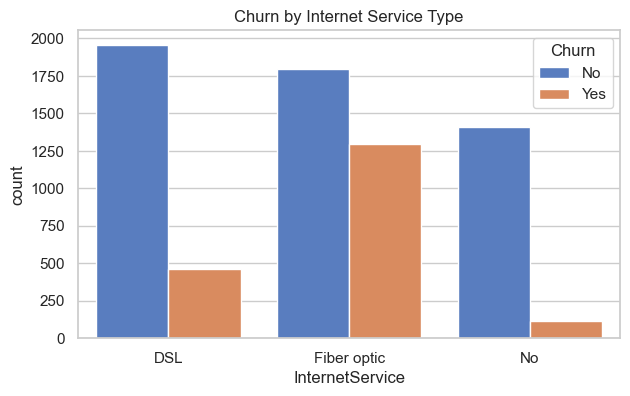

In [228]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='muted')
plt.title('Churn by Internet Service Type')
plt.show()

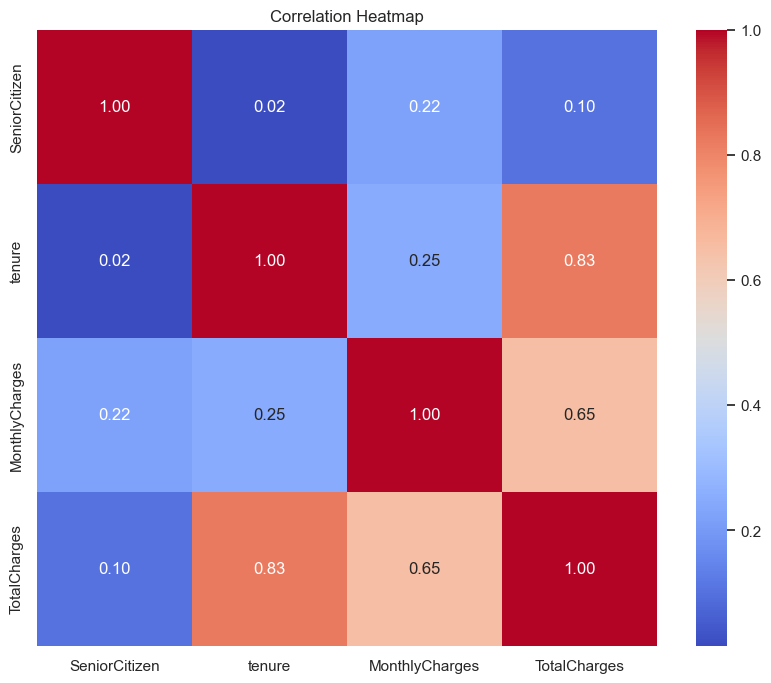

In [229]:
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

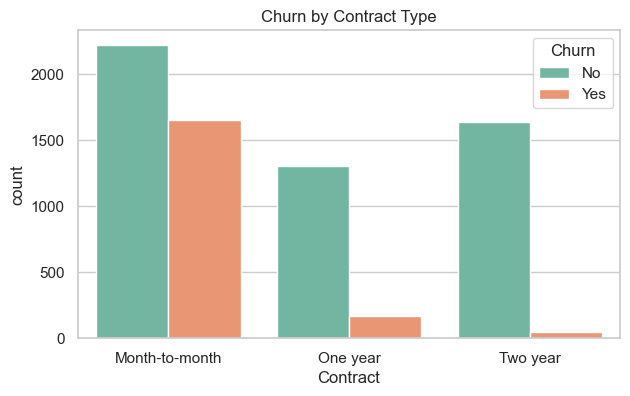

In [230]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn by Contract Type')
plt.show()

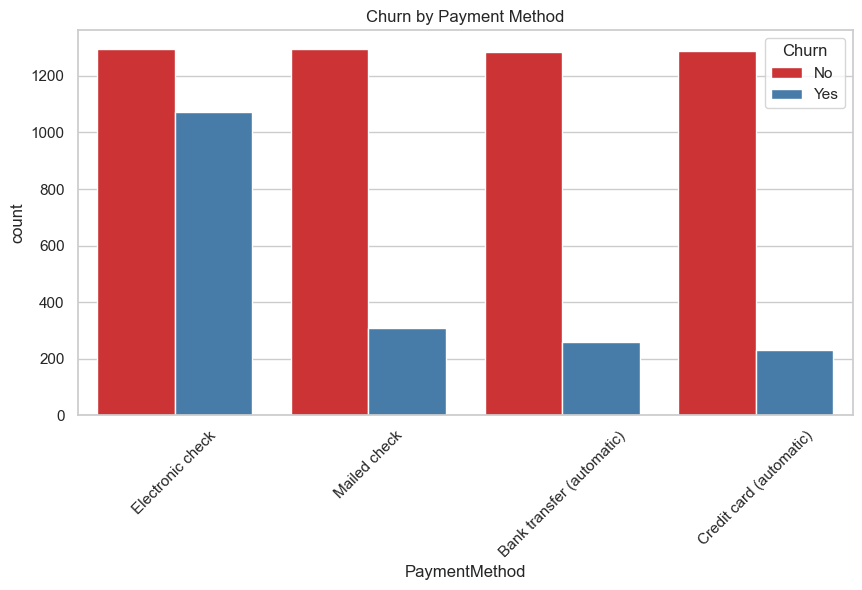

In [231]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set1')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

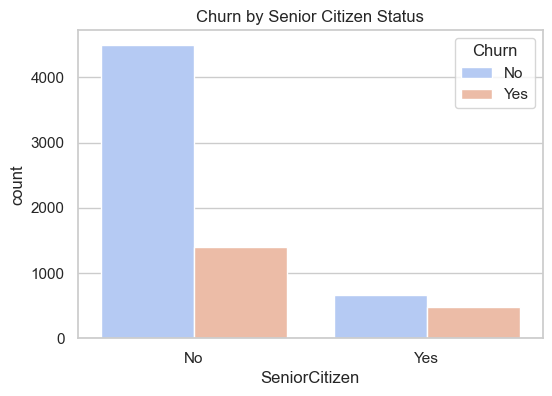

In [232]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='coolwarm')
plt.title('Churn by Senior Citizen Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [233]:
df.drop('customerID', axis=1, inplace=True)

In [234]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [235]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [236]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [238]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [239]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [240]:
y_pred = logreg.predict(X_test_scaled)

Accuracy: 0.8038379530916845
Precision: 0.6475903614457831
Recall: 0.5748663101604278
F1 Score: 0.6090651558073654

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



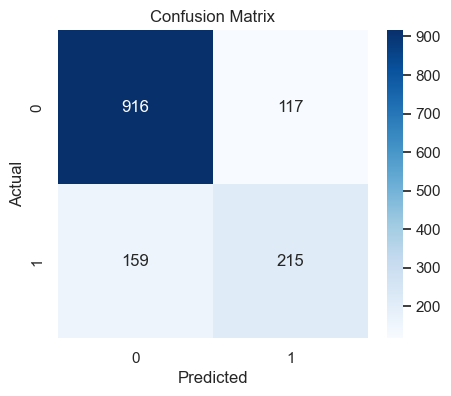

In [241]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Full report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [242]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)

,Feature,Coefficient
10,InternetService_Fiber optic,0.727745
3,TotalCharges,0.639028
21,StreamingTV_Yes,0.249702
23,StreamingMovies_Yes,0.236368
9,MultipleLines_Yes,0.214359
28,PaymentMethod_Electronic check,0.181473
26,PaperlessBilling_Yes,0.142663
0,SeniorCitizen,0.070792
17,DeviceProtection_Yes,0.068965
29,PaymentMethod_Mailed check,0.033392


In [243]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [244]:
y_pred_rf = rf.predict(X_test)

Accuracy: 0.7874911158493249
Precision: 0.6221498371335505
Recall: 0.5106951871657754
F1 Score: 0.5609397944199707

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



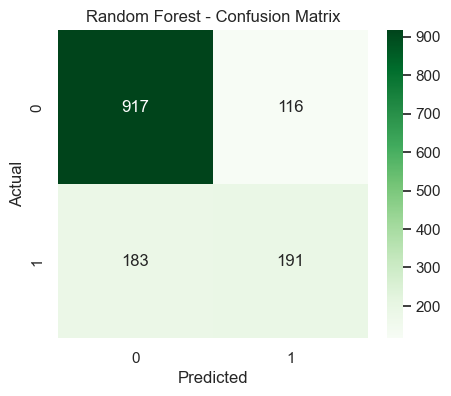

In [245]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Scores
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Full report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [246]:
import pandas as pd

feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_imp.head(10)

,Feature,Importance
3,TotalCharges,0.191748
1,tenure,0.170417
2,MonthlyCharges,0.168513
10,InternetService_Fiber optic,0.039125
28,PaymentMethod_Electronic check,0.037528
25,Contract_Two year,0.030091
4,gender_Male,0.029122
13,OnlineSecurity_Yes,0.028514
26,PaperlessBilling_Yes,0.025664
19,TechSupport_Yes,0.024337


In [247]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [248]:
# Initialize base model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1'  # You can also use 'accuracy' or 'roc_auc'
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [249]:
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred_best = best_rf.predict(X_test)

print("Tuned Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))

Tuned Random Forest Performance:
Accuracy: 0.7903340440653873
Precision: 0.6303630363036303
Recall: 0.5106951871657754
F1 Score: 0.5642540620384048


In [250]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': round(accuracy_score(y_true, y_pred), 4),
        'Precision': round(precision_score(y_true, y_pred), 4),
        'Recall': round(recall_score(y_true, y_pred), 4),
        'F1 Score': round(f1_score(y_true, y_pred), 4)
    }

In [251]:
# Predict again if needed
y_pred_logreg = logreg.predict(X_test_scaled)  # Use scaled if you used StandardScaler
y_pred_best_rf = best_rf.predict(X_test)

In [252]:
import pandas as pd

results = []

results.append(evaluate_model("Logistic Regression", y_test, y_pred_logreg))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))
results.append(evaluate_model("Tuned Random Forest", y_test, y_pred_best_rf))

results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.8038,0.6476,0.5749,0.6091
Random Forest,0.7875,0.6221,0.5107,0.5609
Tuned Random Forest,0.7903,0.6304,0.5107,0.5643


In [253]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Reusable evaluation function
def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': round(accuracy_score(y_true, y_pred), 4),
        'Precision': round(precision_score(y_true, y_pred), 4),
        'Recall': round(recall_score(y_true, y_pred), 4),
        'F1 Score': round(f1_score(y_true, y_pred), 4)
    }

# Gather metrics
results = [
    evaluate_model("Logistic Regression", y_test, y_pred_logreg),
    evaluate_model("Random Forest", y_test, y_pred_rf),
    evaluate_model("Tuned Random Forest", y_test, y_pred_best_rf)
]

# Display comparison
results_df = pd.DataFrame(results).set_index("Model")
results_df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.8038,0.6476,0.5749,0.6091
Random Forest,0.7875,0.6221,0.5107,0.5609
Tuned Random Forest,0.7903,0.6304,0.5107,0.5643


In [254]:
import joblib

# Save tuned model
joblib.dump(best_rf, "churn_model_rf.pkl")

['churn_model_rf.pkl']

In [256]:
import joblib
# Load the model
loaded_model = joblib.load("churn_model_rf.pkl")

# Use it to predict
pred = loaded_model.predict(X_test)

In [257]:
import joblib

# Save the model
joblib.dump(best_rf, 'churn_model_rf.pkl')

# Save the scaler if used
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']